In [1]:
from sqlalchemy import create_engine, text 
import pandas as pd 
import dbutils as db 
import numpy as np 
from sklearn.preprocessing import MinMaxScaler

## Domande sui dati
1. Determinare il gradimento medio per autore
2. Gradimento medio per autore (mostrando la distribuzione dei valori) 
3. Definire un profilo degli utenti sulla base del loro gradimento per il genere letterario, considerando sia il numero di voti sia il valore del voto.
4. Raggruppare gli utenti con simili profili di interessi per i generi letterari 
5. Preso un utente, suggerire un libro che non ha letto sulla base del gradimento per i vari libri da parte di utenti con il profilo simile
   
```
book(id, title, pages, author, rating_count, description)
rating(book, user, rating)
genre(book, genre)
```

In [2]:
connection_string = "sqlite:////Users/flint/Data/kaggle/books/book-recommender/booksdb.sql"
books = db.Books(connection_string=connection_string)

#### 1. Gradimento medio per autore

In [3]:
sql_1 = """
SELECT B.author, AVG(R.rating) AS avg_rating, COUNT(*) AS num_ratings
FROM rating AS R JOIN books AS B
ON R.book = B.id
GROUP BY B.author
""" 
sql_1bis = """
SELECT B.author, R.rating
FROM rating AS R JOIN books AS B
ON R.book = B.id
""" 

In [4]:
answer_1 = books.search(sql=sql_1)

In [5]:
answer_1.sort_values('avg_rating', ascending=False).head(2)

,author,avg_rating,num_ratings
6,Cassandra Clare,4.439496,119
61,R.J. Palacio,4.390110,182


In [6]:
answer_1.head(2)

,author,avg_rating,num_ratings
0,Abbi Glines,4.161078,167
1,Alex Flinn,3.540132,152


In [7]:
answer_1bis = books.search(sql=sql_1bis)

In [8]:
answer_1bis.groupby('author').agg(['mean', 'std'])

rating          
                         mean       std
author                                 
Abbi Glines          4.161078  0.762830
Alex Flinn           3.540132  0.649224
Art Spiegelman       4.238849  0.549771
Becca Fitzpatrick    3.889796  0.706303
Brandon Sanderson    4.362000  0.554828
...                       ...       ...
Tom Clancy           3.826119  0.729603
Tony Moore           4.210256  0.480012
Ursula K. Le Guin    3.795876  0.672312
Veronica Roth        3.991489  0.618298
William Shakespeare  4.165672  0.616577

[83 rows x 2 columns]

#### 2. Distribuzione dei valori di rating per autore

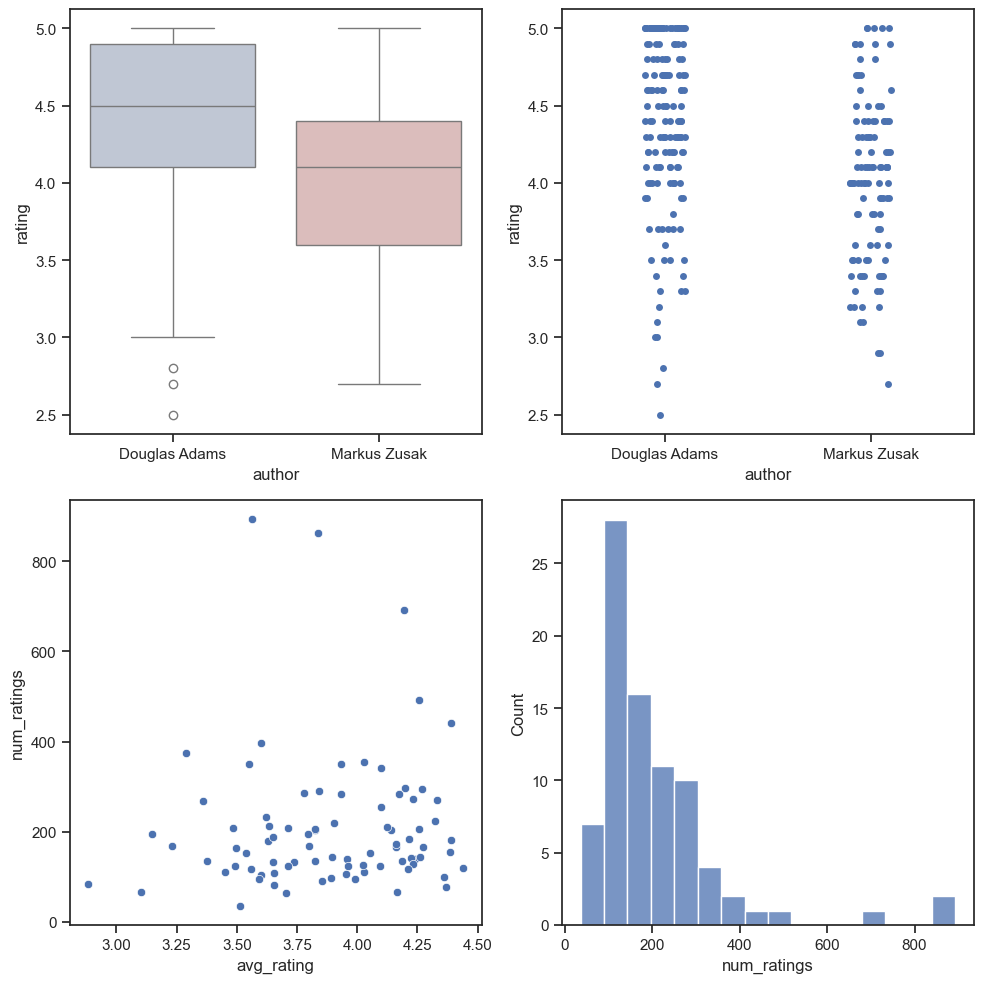

In [9]:
books.create_plots()

#### 3. Definire un profilo degli utenti sulla base del loro gradimento per il genere letterario, considerando sia il numero di voti sia il valore del voto.
```
book(id, title, pages, author, rating_count, description)
rating(book, user, rating)
genre(book, genre)
```

In [10]:
books.profile

,biography,children,comics,crime,fantasy,fiction,graphic,historical fiction,history,mystery,non-fiction,paranormal,romance,thriller,young-adult,poetry
0,1.0,0.189189,0.517241,0.479339,0.172414,0.555556,0.517241,1.0,1.0,0.479339,0.581395,0.172414,0.158730,0.479339,0.555556,0.0
1,0.0,0.000000,0.000000,0.264463,0.000000,0.169312,0.000000,0.0,0.0,0.264463,0.000000,0.000000,0.000000,0.264463,0.000000,0.0
3,0.0,0.000000,0.000000,0.000000,0.000000,0.201058,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.201058,0.000000,0.201058,0.0
4,0.0,0.000000,0.000000,0.000000,0.189655,0.174603,0.000000,0.0,0.0,0.000000,0.000000,0.189655,0.174603,0.000000,0.000000,0.0
7,0.0,0.297297,0.000000,0.000000,0.252874,0.232804,0.000000,0.0,0.0,0.000000,0.000000,0.252874,0.232804,0.000000,0.232804,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83971,0.0,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.0
84075,0.0,0.000000,0.000000,0.000000,0.241379,0.222222,0.000000,0.0,0.0,0.000000,0.000000,0.241379,0.000000,0.000000,0.222222,0.0
84107,0.0,0.000000,0.000000,0.000000,0.000000,0.089947,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.089947,0.000000,0.000000,0.0
84228,0.0,0.000000,0.000000,0.000000,0.000000,0.201058,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.201058,0.000000,0.201058,0.0


In [11]:
books.get_user_profile(83971)

biography             0.000000
children              0.000000
comics                0.000000
crime                 0.000000
fantasy               0.000000
fiction               0.142857
graphic               0.000000
historical fiction    0.000000
history               0.000000
mystery               0.000000
non-fiction           0.000000
paranormal            0.000000
romance               0.142857
thriller              0.000000
young-adult           0.000000
poetry                0.000000
Name: 83971, dtype: float64

In [13]:
books.get_genre_profile('comics').sort_values(ascending=False)

73790    1.000000
37259    0.931034
55505    0.827586
32185    0.689655
10840    0.662069
           ...   
23179    0.000000
23190    0.000000
23192    0.000000
23198    0.000000
84290    0.000000
Name: comics, Length: 15039, dtype: float64